In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import multiprocessing
import sys
import logging
import scipy.interpolate
import glob
import pandas as pd

In [2]:
def apply_interpolation(x, y, target_size):
    '''
    Resizes a chromatogram to a given size/resolution
    '''
    f = scipy.interpolate.interp1d(x, y)
    xnew = np.linspace(x.min(), x.max(), target_size)
    ynew = f(xnew)
    return xnew, ynew

def apply_interpolation(y, target_size):
    '''
    Resizes a chromatogram to a given size/resolution
    '''
    x = np.linspace(0, 1, len(y))
    f = scipy.interpolate.interp1d(x, y)
    xnew = np.linspace(0, 1, target_size)
    ynew = f(xnew)
    return ynew

In [14]:
d.shape

(16384,)

(-10.0, 10.0)

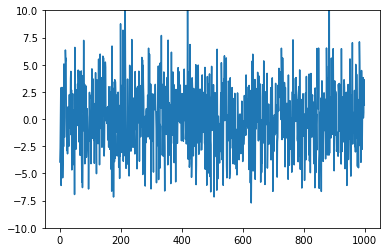

In [26]:

x = np.random.randn(1000) + np.random.randn(1000) + np.random.randn(1000) + np.random.randn(1000) + np.random.randn(1000)

x += np.random.randn(1000) + np.random.randn(1000) + np.random.randn(1000) + np.random.randn(1000)
plt.plot(x)


plt.ylim(-10, 10)

In [63]:
sorted_index = np.array([ 0, 21, 20,  6, 22, 18, 48,  5, 10,  7, 12, 49, 31, 13,  8,  9, 35,
       33, 11, 23, 25, 38, 37, 47, 41, 46, 42,  3, 39, 45,  1,  4, 16, 26,
       24, 17, 14, 34, 29,  2, 19, 40, 28, 44, 30, 27, 32, 36, 15, 43])

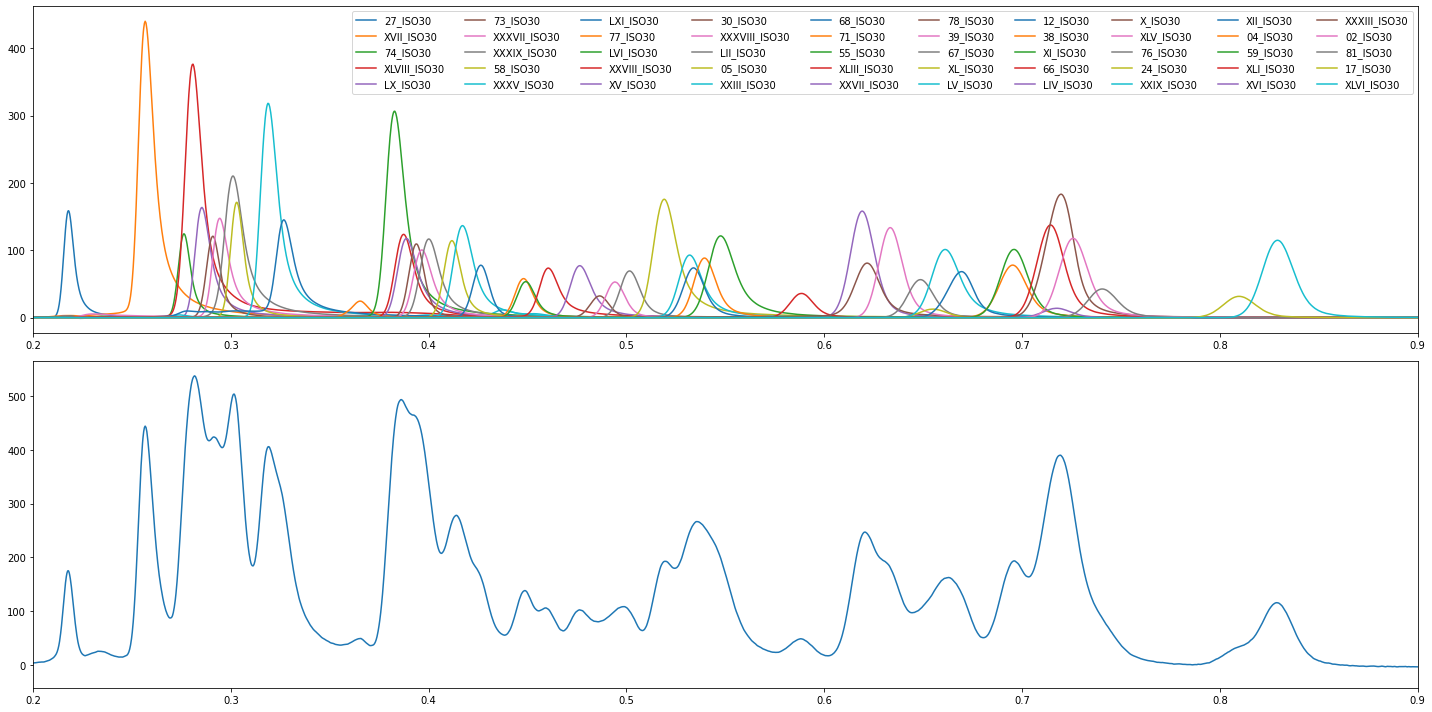

In [64]:
fig, axes = plt.subplots(2,1, figsize=(20, 10))

chromatogram = np.zeros(16384)

files = np.array(glob.glob('../input/ISO30/*.CSV'))[sorted_index]
compounds = [f.split('/')[-1].split('.CSV')[0] for f in files]

keep_list = [
    '27_ISO30',    'XVII_ISO30',   '74_ISO30',      'XLVIII_ISO30', 'LX_ISO30',
    '73_ISO30',    'XXXVII_ISO30', 'XXXIX_ISO30',   '58_ISO30',
    'XXXV_ISO30',  'LXI_ISO30',    '77_ISO30',      'LVI_ISO30',    'XXVIII_ISO30',
    'XV_ISO30',    '30_ISO30',     'XXXVIII_ISO30', 'LII_ISO30',    '05_ISO30',
    'XXIII_ISO30', '68_ISO30',     '71_ISO30',      '55_ISO30',     'XLIII_ISO30',
    'XXVII_ISO30', '78_ISO30',     '39_ISO30',      '67_ISO30',     'XL_ISO30',
    'LV_ISO30',    '12_ISO30',     '38_ISO30',      'XI_ISO30',     '66_ISO30',
    'LIV_ISO30',   'X_ISO30',      'XLV_ISO30',     '76_ISO30',     '24_ISO30',
    'XXIX_ISO30',  'XII_ISO30',    '04_ISO30',      '59_ISO30',     'XLI_ISO30',
    'XVI_ISO30',   'XXXIII_ISO30', '02_ISO30',      '81_ISO30',     '17_ISO30',
    'XLVI_ISO30'
]

rt = []
for file, compound in zip(files, compounds):
    
    if compound in keep_list:
        
        csv = pd.read_csv(file, header=None, sep='\t', encoding='utf-16')
        peak = csv[1].values
        peak = apply_interpolation(peak, 16384)
        
        index = np.argmax(peak)
        rt.append(index)
        chromatogram += peak
        axes[0].plot(np.linspace(0, 1, 16384), peak, label=compound)
        
axes[1].plot(np.linspace(0, 1, 16384), chromatogram)
axes[1].set_xlim(0.2, 0.9)
axes[0].set_xlim(0.2, 0.9)
axes[0].legend(ncol=10)

plt.tight_layout()
#plt.savefig('ISO_40.png', dpi=200)

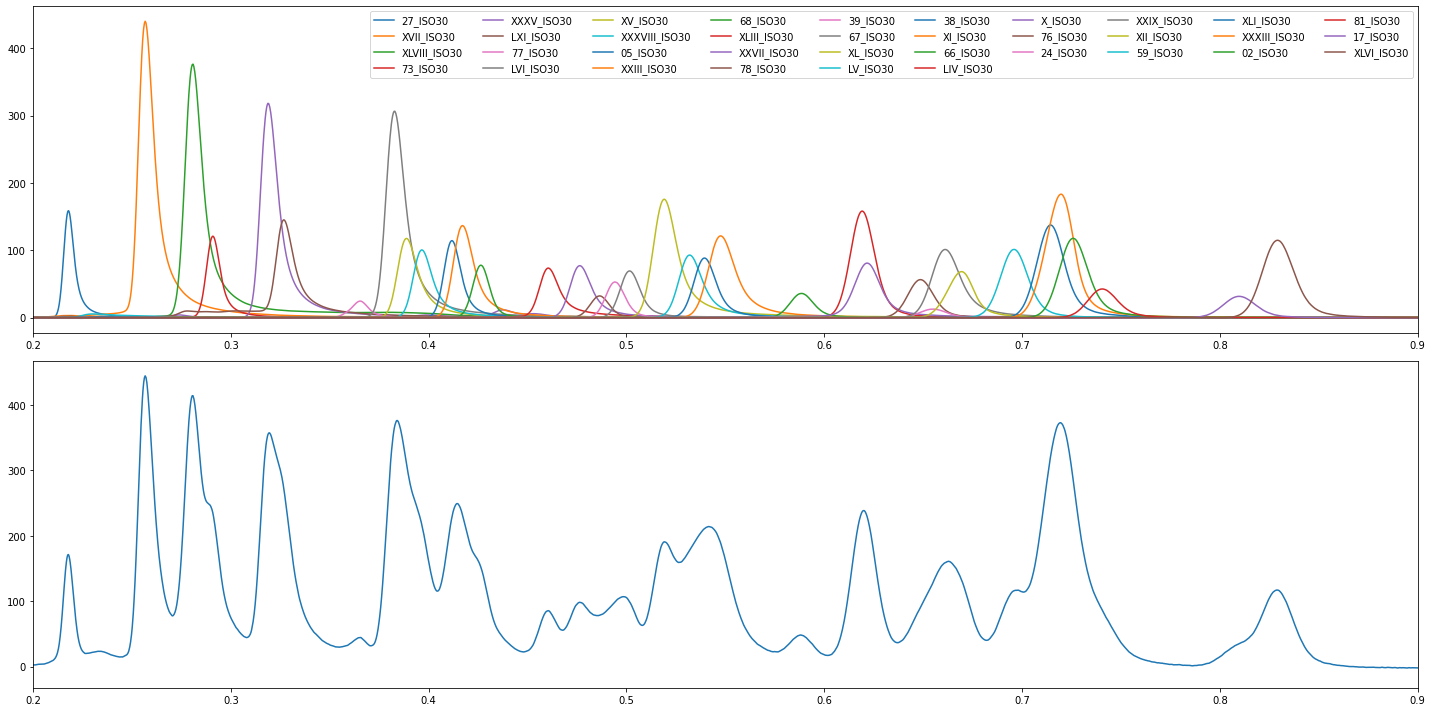

In [91]:
fig, axes = plt.subplots(2,1, figsize=(20, 10))

chromatogram = np.zeros(16384)

files = np.array(glob.glob('../input/ISO30/*.CSV'))[sorted_index]
compounds = [f.split('/')[-1].split('.CSV')[0] for f in files]

keep_list = [
    '27_ISO30',    'XVII_ISO30',     'XLVIII_ISO30', '73_ISO30',    
    'XXXV_ISO30',  'LXI_ISO30',    '77_ISO30',      'LVI_ISO30',  
    'XV_ISO30',    'XXXVIII_ISO30',  '05_ISO30',
    'XXIII_ISO30', '68_ISO30',      'XLIII_ISO30',
    'XXVII_ISO30', '78_ISO30',     '39_ISO30',      '67_ISO30',     'XL_ISO30',
    'LV_ISO30',       '38_ISO30',      'XI_ISO30',     '66_ISO30',
    'LIV_ISO30',   'X_ISO30',        '76_ISO30',     '24_ISO30',
    'XXIX_ISO30',  'XII_ISO30',        '59_ISO30',     'XLI_ISO30',
    'XXXIII_ISO30', '02_ISO30',      '81_ISO30',     '17_ISO30',
    'XLVI_ISO30'
]

rt = []
for file, compound in zip(files, compounds):
    
    if compound in keep_list:
        
        csv = pd.read_csv(file, header=None, sep='\t', encoding='utf-16')
        peak = csv[1].values
        peak = apply_interpolation(peak, 16384)
        
        index = np.argmax(peak)
        rt.append(index)
        chromatogram += peak
        axes[0].plot(np.linspace(0, 1, 16384), peak, label=compound)
        
axes[1].plot(np.linspace(0, 1, 16384), chromatogram)
axes[1].set_xlim(0.2, 0.9)
axes[0].set_xlim(0.2, 0.9)
axes[0].legend(ncol=10)

plt.tight_layout()
plt.savefig('ISO_40_Mixture1.png', dpi=200)

In [90]:
np.array(keep_list)

array(['27_ISO30', 'XVII_ISO30', 'XLVIII_ISO30', '73_ISO30', 'XXXV_ISO30',
       'LXI_ISO30', '77_ISO30', 'LVI_ISO30', 'XV_ISO30', 'XXXVIII_ISO30',
       '05_ISO30', 'XXIII_ISO30', '68_ISO30', 'XLIII_ISO30',
       'XXVII_ISO30', '78_ISO30', '39_ISO30', '67_ISO30', 'XL_ISO30',
       'LV_ISO30', '38_ISO30', 'XI_ISO30', '66_ISO30', 'LIV_ISO30',
       'X_ISO30', '76_ISO30', '24_ISO30', 'XXIX_ISO30', 'XII_ISO30',
       '59_ISO30', 'XLI_ISO30', 'XXXIII_ISO30', '02_ISO30', '81_ISO30',
       '17_ISO30', 'XLVI_ISO30'], dtype='<U13')

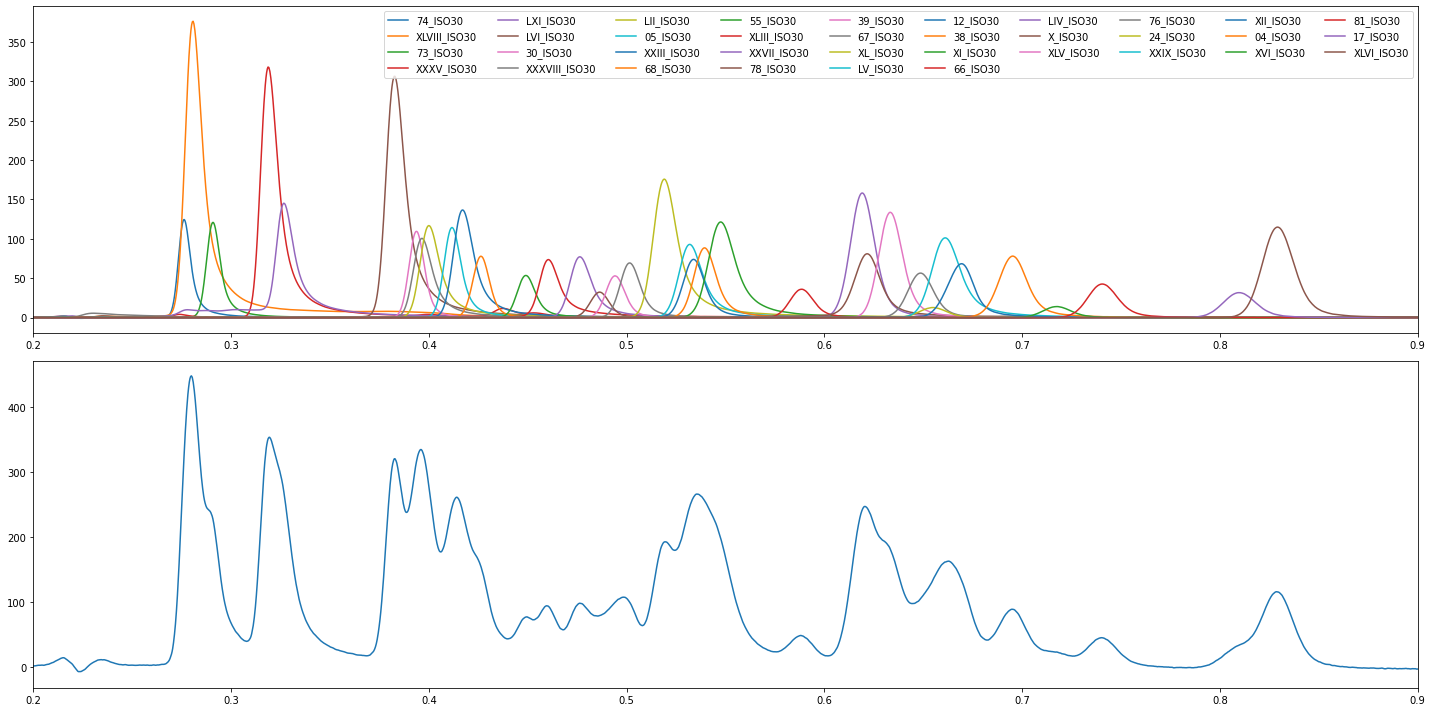

In [104]:
fig, axes = plt.subplots(2,1, figsize=(20, 10))

chromatogram = np.zeros(16384)

files = np.array(glob.glob('../input/ISO30/*.CSV'))[sorted_index]
compounds = [f.split('/')[-1].split('.CSV')[0] for f in files]

keep_list = [
    '74_ISO30',      'XLVIII_ISO30',
    '73_ISO30', 
    'XXXV_ISO30',  'LXI_ISO30',      'LVI_ISO30',   
        '30_ISO30',     'XXXVIII_ISO30', 'LII_ISO30',    '05_ISO30',
    'XXIII_ISO30', '68_ISO30',      '55_ISO30',     'XLIII_ISO30',
    'XXVII_ISO30', '78_ISO30',     '39_ISO30',      '67_ISO30',     'XL_ISO30',
    'LV_ISO30',    '12_ISO30',     '38_ISO30',      'XI_ISO30',     '66_ISO30',
    'LIV_ISO30',   'X_ISO30',      'XLV_ISO30',     '76_ISO30',     '24_ISO30',
    'XXIX_ISO30',  'XII_ISO30',    '04_ISO30',     
    'XVI_ISO30',     '81_ISO30',     '17_ISO30',
    'XLVI_ISO30'
]

rt = []
for file, compound in zip(files, compounds):
    
    if compound in keep_list:
        
        csv = pd.read_csv(file, header=None, sep='\t', encoding='utf-16')
        peak = csv[1].values
        peak = apply_interpolation(peak, 16384)
        
        index = np.argmax(peak)
        rt.append(index)
        chromatogram += peak
        axes[0].plot(np.linspace(0, 1, 16384), peak, label=compound)
        
axes[1].plot(np.linspace(0, 1, 16384), chromatogram)
axes[1].set_xlim(0.2, 0.9)
axes[0].set_xlim(0.2, 0.9)
axes[0].legend(ncol=10)

plt.tight_layout()
plt.savefig('ISO_30_Mixture2.png', dpi=200)

In [106]:
np.array(keep_list)

array(['74_ISO30', 'XLVIII_ISO30', '73_ISO30', 'XXXV_ISO30', 'LXI_ISO30',
       'LVI_ISO30', '30_ISO30', 'XXXVIII_ISO30', 'LII_ISO30', '05_ISO30',
       'XXIII_ISO30', '68_ISO30', '55_ISO30', 'XLIII_ISO30',
       'XXVII_ISO30', '78_ISO30', '39_ISO30', '67_ISO30', 'XL_ISO30',
       'LV_ISO30', '12_ISO30', '38_ISO30', 'XI_ISO30', '66_ISO30',
       'LIV_ISO30', 'X_ISO30', 'XLV_ISO30', '76_ISO30', '24_ISO30',
       'XXIX_ISO30', 'XII_ISO30', '04_ISO30', 'XVI_ISO30', '81_ISO30',
       '17_ISO30', 'XLVI_ISO30'], dtype='<U13')

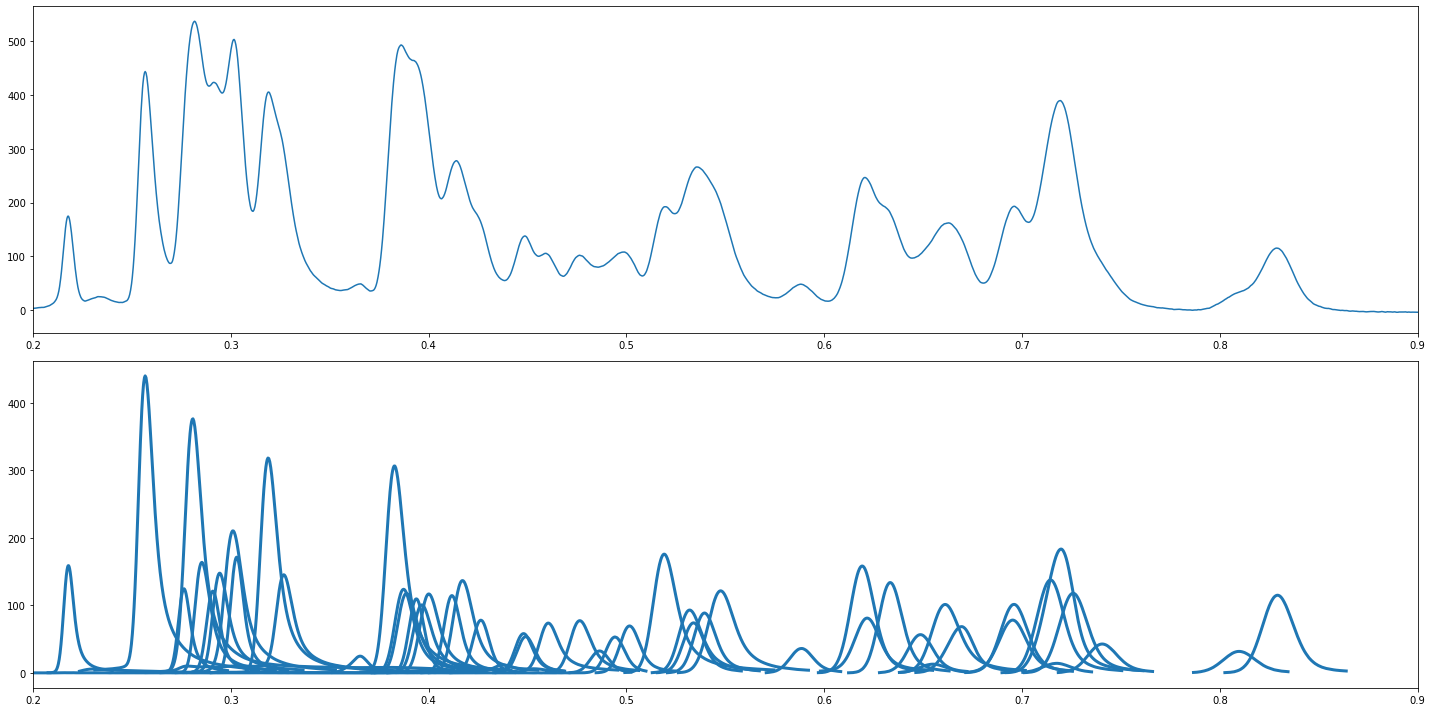

In [35]:
fig, axes = plt.subplots(2,1, figsize=(20, 10))

chromatogram = np.zeros(16384)

for c in glob.glob('../input/ISO30/*.CSV'):
    csv = pd.read_csv(c, header=None, sep='\t', encoding='utf-16')
    d = csv[1].values
    d = apply_interpolation(d, 16384)
    chromatogram += d
    idx = np.where(d > 5)[0]
    s, e = idx[0], idx[-1]
    ex = 50 + int((100 * np.linspace(0, 1, 16384)[s]))
    axes[1].plot(np.linspace(0, 1, 16384)[s-ex:e+ex], d[s-ex:e+ex], c='C0', linewidth=3)
    
axes[0].plot(np.linspace(0, 1, 16384), chromatogram)
axes[0].set_xlim(0.2, 0.9)
axes[1].set_xlim(0.2, 0.9)

plt.tight_layout()
plt.savefig('ISO_30.png', dpi=200)

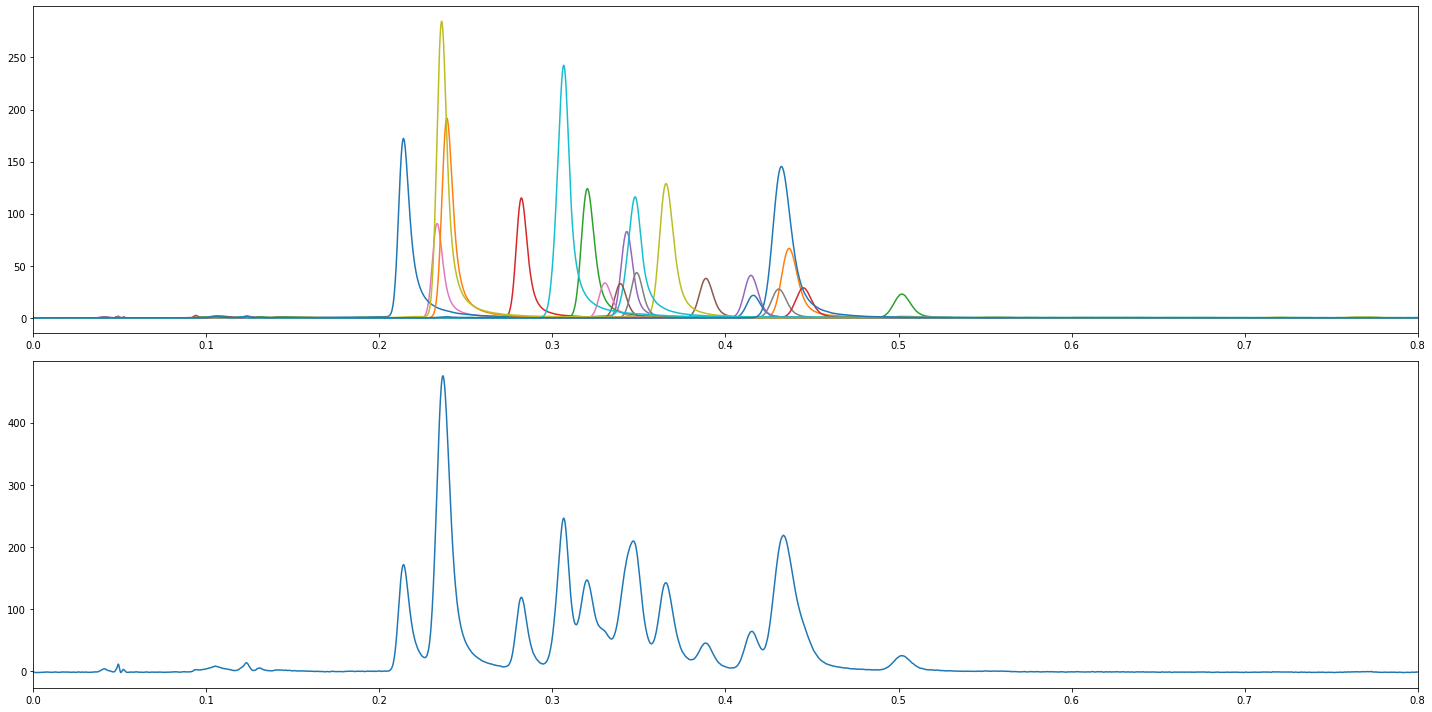

In [111]:
fig, axes = plt.subplots(2,1, figsize=(20, 10))

chromatogram = np.zeros(16384)

for c in glob.glob('../input/ISO10/*.CSV'):
    csv = pd.read_csv(c, header=None, sep='\t', encoding='utf-16')
    d = csv[1].values
    d = apply_interpolation(d, 16384)
    chromatogram += d
    axes[0].plot(np.linspace(0, 1, 16384), d)
    
axes[1].plot(np.linspace(0, 1, 16384), chromatogram)
axes[1].set_xlim(0.0, 0.8)
axes[0].set_xlim(0.0, 0.8)

plt.tight_layout()
plt.savefig('ISO_10_all_compounds.png', dpi=200)

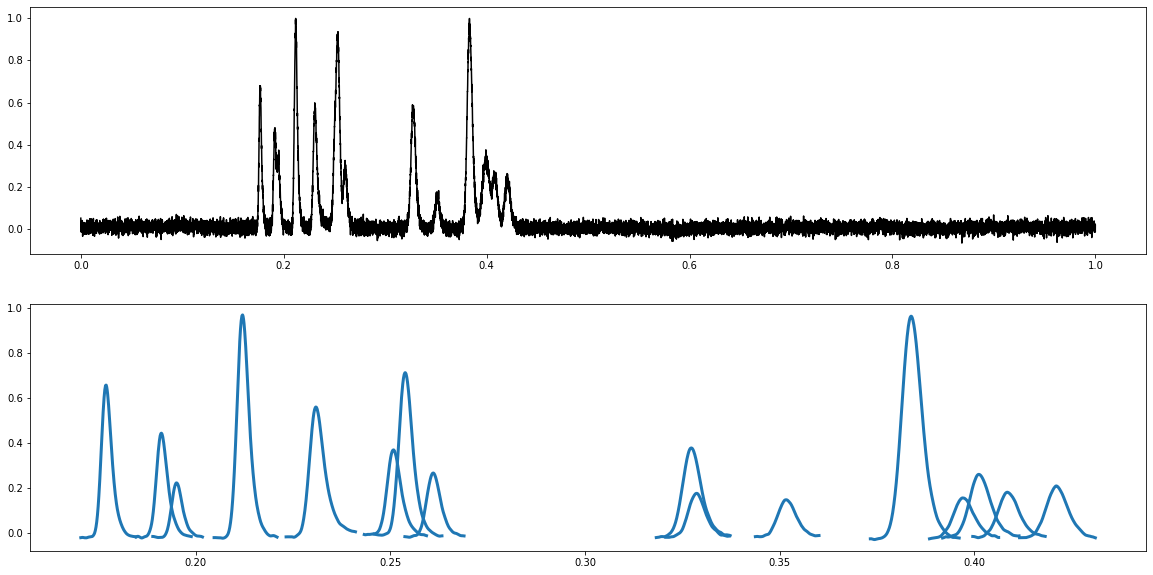

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

csv = pd.read_csv('../input/chrom_1/ISO_ALL_F160.CSV', header=None, sep='\t', encoding='utf-16')
x = csv[1].values
x = apply_interpolation(x, 16384)
x_max = x.max()
x = x[None, :, None] / x_max

for c in glob.glob('../input/chrom_1/ISO_[0-9]*'):
    csv = pd.read_csv(c, header=None, sep='\t', encoding='utf-16')
    d = csv[1].values
    d = apply_interpolation(d, 16384)
    d = d / x_max
    idx = np.where(d > 0.05)[0]
    s, e = idx[0], idx[-1]
    ex = 50 + int((100 * np.linspace(0, 1, 16384)[s]))
    axes[1].plot(np.linspace(0, 1, 16384)[s-ex:e+ex], d[s-ex:e+ex], c='C0', linewidth=3)
    
axes[0].plot(np.linspace(0, 1, 16384), x[0, :, 0], c='black', linestyle='-')

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

csv = pd.read_csv('../input/chrom_1/ISO_ALL_F160.CSV', header=None, sep='\t', encoding='utf-16')
x = csv[1].values
x = apply_interpolation(x, 16384)
x_max = x.max()
x = x[None, :, None] / x_max
out = model.predict(x)[0]

for c in glob.glob('../input/chrom_1/ISO_[0-9]*'):
    csv = pd.read_csv(c, header=None, sep='\t', encoding='utf-16')
    d = csv[1].values
    d = apply_interpolation(d, 16384)
    d = d / x_max
    idx = np.where(d > 0.05)[0]
    s, e = idx[0], idx[-1]
    ex = 50 + int((100 * np.linspace(0, 1, 16384)[s]))
    axes[1].plot(np.linspace(0, 1, 16384)[s-ex:e+ex], d[s-ex:e+ex], c='C0', linewidth=3)
    
    
probs, locs, areas = label_encoder.decode(out, 0.4)
for i, (p, l, a) in enumerate(zip(probs, locs, areas)):
    axes[1].scatter(l, np.min(x)-0.15, marker='^', c=f'C1')
    axes[1].text(x=l, y=-0.45, s=f'{p:.3f}', rotation=-45)
    axes[1].axvline(l, c='C1', linestyle=':', linewidth=2)
    axes[0].axvline(l, c='C1', linestyle=':', linewidth=2)
    
axes[0].plot(np.linspace(0, 1, 16384), x[0, :, 0], c='black', linestyle='-')

axes[0].set_xlim(0.15, 0.45)
axes[1].set_xlim(0.15, 0.45)

axes[0].tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].spines['top'].set_visible(False)
axes[1].axhline(1.05, c='black', linewidth=1, linestyle=':')
axes[0].set_ylim(-0.5, 1.05)
axes[1].set_ylim(-0.5, 1.05)
plt.subplots_adjust(hspace=-0.2)

In [14]:
arr = np.array([5,11,12,1,4,8])
a = arr.copy()

i = np.argsort(a)

a = a[i]
diff = np.diff(a)
remove_idx_ = np.where(diff < 2)[0]
print(i[remove_idx_])

[4 1]


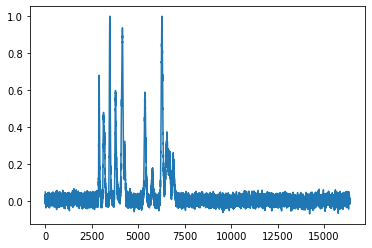

In [15]:
x = x[0, :, 0]
plt.plot(x)

In [ ]:
import scipy.signal

plt.figure(figsize=(80, 8))
deriv = scipy.signal.savgol_filter(x, window_length=51, polyorder=2, deriv=2)

plt.plot(x[2000:7000] * 0.001)
plt.plot(deriv[2000:7000])

In [ ]:
plt.figure(figsize=(60, 10))


csv = pd.read_csv('../input/chrom_1/GRA_ALL_F160.CSV', header=None, sep='\t', encoding='utf-16')
x = csv[1].values
x = apply_interpolation(x, 16384)
x_max = x.max()
x = x[None, :, None] / x_max
out = model.predict(x)[0]

for c in glob.glob('../input/chrom_1/GRA_[0-9]*'):
    csv = pd.read_csv(c, header=None, sep='\t', encoding='utf-16')
    d = csv[1].values
    d = apply_interpolation(d, 16384)
    d = d / x_max
    plt.plot(d)
    
    
probs, locs, areas = label_encoder.decode(out, 0.5)
for i, (p, l, a) in enumerate(zip(probs, locs, areas)):
   # print(p, l, a)
    plt.scatter(l * 16384, np.min(x)-0.2, c=f'C{i}', label=f'{p:.2f}')
    #plt.text(x=l * 16384, y=np.min(x)-0, s=f'{p:.2f}', rotation=-45)
    #plt.plot([l-w/2, l+w/2], [.080+(i*.015), .080+(i*.015)], color=f'C{i}')
    #plt.plot([l, l], [0, a], color='C0', linewidth=4, linestyle=':')
    #plt.plot([l-s/2, l+s/2], [0, 0], color='C0', linewidth=4, linestyle=':')
    
    #index = int(g * 16384)
    #height = max(x[index-10:index+10]) + 20
    #plt.text(x=g-0.005, y=height, s=f"{a:.2f}", color='C1', fontsize=14)

plt.legend(loc=2, ncol=10)
plt.plot(x[0, :, 0], c='black', linestyle='--')


In [ ]:
for _ in range(6):
    
    model.fit(train_generator, use_multiprocessing=False, workers=8)
    #out = model.evaluate(validation_generator, use_multiprocessing=False, workers=8)
    
    current_lr = model.optimizer.learning_rate
    model.optimizer.learning_rate.assign(current_lr * (1 - LEARNING_RATE_DECAY))
    
    
    

In [ ]:
encoder.num_windows

In [ ]:
true[0]

In [ ]:
class TemperatureSoftmaxCalibration(tf.keras.Model):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.temperature = tf.Variable(1., trainable=True)
    
    def call(self, inputs):
        z = inputs / self.temperature
        p = tf.nn.sigmoid(z)
        return p
    
# class TemperatureSoftmaxCalibration(tf.keras.Model):
    
#     def __init__(self, **kwargs):
#         super().__init__(**kwargs)
#         self.a = tf.Variable(1., trainable=True)
#         self.b = tf.Variable(0., trainable=True)
    
#     def call(self, inputs):
#         z = self.a * inputs + self.b
#         p = tf.nn.sigmoid(z)
#         return p
    
calib = TemperatureSoftmaxCalibration()

calib.compile(loss='bce', optimizer=tf.keras.optimizers.Adam(1e-2))

predictions = model.predict(x_validation)

preds = predictions[:, :, 0]
preds = tf.math.log(preds/(1-preds+1e-7))

trues = y_validation[:, :, 0],

calib.fit(preds, trues, epochs=100, verbose=2)

In [ ]:
a = np.array([0.1, 0.01, 0.02, 0.01, 0.005])**0.5

a / a.sum()

In [ ]:
x_validation, y_validation = x[:1000], y[:1000]

In [ ]:
calib.trainable_weights

In [ ]:
new_preds = calib.predict(preds)
new_preds[0][50:250]

In [ ]:
tf.nn.sigmoid(preds)[0][50:250]

In [ ]:
import tensorflow_probability as tfp

tfp.stats.expected_calibration_error(
    num_bins=10, 
    logits=tf.reshape(tf.nn.sigmoid(preds), (-1, 1)), 
    labels_true=tf.cast(tf.reshape(trues, (-1)) > 0.5, 'int32'), 
    labels_predicted=tf.cast(tf.reshape(tf.nn.sigmoid(preds), (-1)) > 0.5, 'int32'),
)

In [ ]:
tfp.stats.expected_calibration_error(
    num_bins=10, 
    logits=tf.reshape(new_preds, (-1, 1)), 
    labels_true=tf.cast(tf.reshape(trues, (-1)) > 0.5, 'int32'), 
    labels_predicted=tf.cast(tf.reshape(new_preds, (-1)) > 0.5, 'int32'),
)

In [ ]:
plt.hist(tf.reshape(new_preds, (-1)), bins=100);

In [ ]:
plt.hist(tf.reshape(tf.nn.sigmoid(preds), (-1)), bins=100);